# BULLET DROP SIMULATOR - MODIFIED FOR KNUCKLEBALL

In [1]:
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

gravity = 9.80665
air_den = 1.2

# Bullet templates
five56 = {
    'drag_coef':0.388,
    'cross_sec':0.000025419304,
    'mass' : 0.0123
}

three08 = {
    'drag_coef':0.295,
    'cross_sec':4.8e-05,
    'mass' : 0.016
}

Beberapa rumus yang digunakan dalam perhitungan simulasi peluru adalah sebagai berikut

#### y-component initial velocity:<br>
$v_y = v \sin(\theta)$

rumus ini digunakan untuk menghitung kecepatan inisial $v_y$ dengan mengalikan kecepatan peluru dengan hasil sin dari sudut
___

#### y-component displacement formula:
$y = v_{0y}t-0.5gt^2$

rumus ini digunakan untuk menghitung perpindahan ketinggian/letak sumbu-y peluru
___
#### x-component initial velocity:
$v_x = v \cos(\theta)$

rumus ini digunakan untuk menghitung kecepatan inisial $v_y$ dengan mengalikan kecepatan peluru dengan hasil sin dari sudut
___
#### x drag force:
$F_{drag} = \frac{-C\rho Av^2}{2}$

rumus ini digunakan untuk menghitung gaya hambat/drag dari sumbu-x
___

dari rumus gaya hambat/drag diatas, dapat dicari rumus akselerasi/deselerasi akibat hambatan/drag

#### x drag deceleration:
$F_{drag} = m a$<br><br>
$a = \frac{F_{drag}}{m}$<br><br>
$a = \frac{-C\rho Av^2}{2m}$<br><br>
___

kemudian rumus deselerasi tersebut dapat dimasukkan dalam menghitung kecepatan $v_x$ pata waktu $t$

#### x-speed formula with drag/deceleration
$v_{tx} = v_{0x} + at$
___


## Function Initialization

In [2]:
def calculate_init_velocity_y(velocity, angle):
    vy = velocity * np.sin((np.deg2rad(angle)))
    return vy


def calculate_init_velocity_x(velocity, angle):
    vx = velocity * np.cos((np.deg2rad(angle)))
    return vx


def calculate_displacement_y(velo, time):
    y = velo * time - 0.5 * gravity * (time ** 2)
    return y


def calculate_velocity_x_with_drag(velo, time, bltinf):
    a = -(bltinf['drag_coef'] * air_den * bltinf['cross_sec'] * (velo**2)) / 2 * bltinf['mass']
    vt = velo + a * time
    return vt


def calculate_distance_x(velo, time):
    return velo * time


# Menghitung koordinat pada sumbu-x dan z dari jarak dan arah
def calculate_coordinates(dist, angle):
    x = 0.0
    z = 0.0
    
    x = np.sin((np.deg2rad(angle)))
    z = np.cos((np.deg2rad(angle)))
        
    if x < 0.0001:
        x = 0
    if z < 0.0001:
        z = 0
        
    return x * dist, z * dist

def calculate_osc_knucleball(time):
    mult = 1.0 - time
    if mult < 0:
        mult = 0
    return (np.sin((np.deg2rad(time * 360))) * mult)

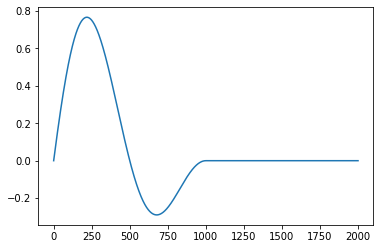

In [3]:
def sin_wave(angle):
    return np.sin((np.deg2rad(angle)))

sin_plot = []

time = 0.0

while(time < 2.0):
    mult = 1.0 - time
    if mult < 0:
        mult = 0
    sin_plot.append(sin_wave(time * 360) * mult)
    time = time + 0.001
    
plt.plot(sin_plot)
plt.show()

## Main Operation

In [4]:
# initialize initial velocity, elevation, and height
velocity = 50.0
elevation = 5.0
direction = 90.0
person_coor = (0, 0)
wind_dir = 0.0
wind_spd = 0.0
caliber = five56
vy = calculate_init_velocity_y(velocity, elevation)
vx = calculate_init_velocity_x(velocity, elevation)
initial_h = 0

# initialize list to hold values for plot later
y_coordinates = []
distance = []
x_coordinates = []
z_coordinates = []
horizontal_spd = []
timeframe = []

# holds the final distance where the bullet meets ground
x_touchdown = 0

# calculation
x = 0.0
time = 0.0
while(True):
    y = initial_h + calculate_displacement_y(vy, time)
    vx = calculate_velocity_x_with_drag(vx, time, caliber)
    x = x + calculate_distance_x(vx, 0.001)
    
    # stops the operation when bullet hits the ground level
    if y < 0.0:
        x_touchdown = x
        break
        
    x_coor, z_coor = calculate_coordinates(x, direction)
    
    # append to the lists for plotting
    x_coordinates.append(x_coor + person_coor[0])
    z_coordinates.append(z_coor + person_coor[1] + calculate_osc_knucleball(time))
    distance.append(x)
    y_coordinates.append(y)
    horizontal_spd.append(vx)
    timeframe.append(time)
    
    time = time + 0.001

## Data Plotting

Bullet travel


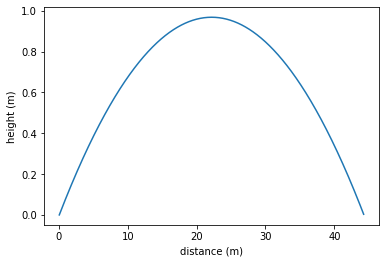

Bullet height


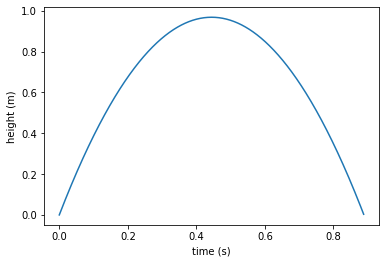

Bullet distance


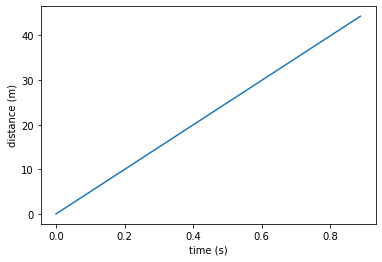

Bullet speed


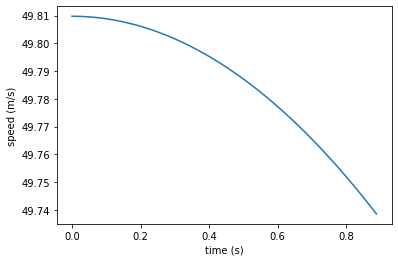

In [5]:
plt.plot(distance, y_coordinates)
plt.xlabel('distance (m)')
plt.ylabel('height (m)')

print('Bullet travel')
plt.show()

plt.plot(timeframe, y_coordinates)
plt.xlabel('time (s)')
plt.ylabel('height (m)')

print('Bullet height')
plt.show()

plt.plot(timeframe, distance)
plt.xlabel('time (s)')
plt.ylabel('distance (m)')

print('Bullet distance')
plt.show()

plt.plot(timeframe, horizontal_spd)
plt.xlabel('time (s)')
plt.ylabel('speed (m/s)')

print('Bullet speed')
plt.show()

X-Z coordinates


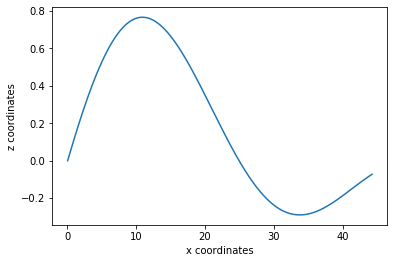

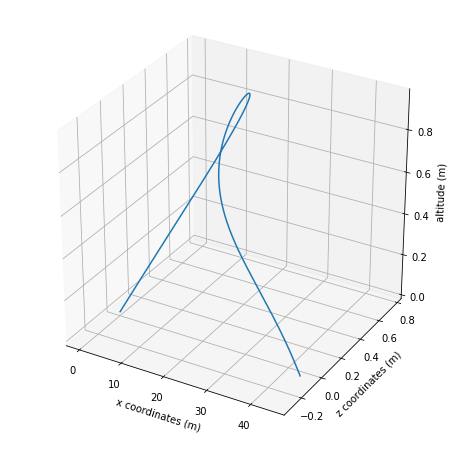

Bullet touched the ground on 0.8890000000000007s at 44.30946458589353m away
Coordinates of the touchdown: 44.25972618891215m, -0.07247026769577701m
Final horizontal velocity is 49.73839698138334m/s


In [6]:
plt.plot(x_coordinates, z_coordinates)
plt.xlabel('x coordinates')
plt.ylabel('z coordinates')

print('X-Z coordinates')
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection="3d")

ax.plot3D(x_coordinates, z_coordinates, y_coordinates)
plt.xlabel('x coordinates (m)')
plt.ylabel('z coordinates (m)')
ax.set_zlabel('altitude (m)')

plt.show()

print('Bullet touched the ground on {}s at {}m away'.format(time, x_touchdown))
print('Coordinates of the touchdown: {}m, {}m'.format(x_coordinates[-1], z_coordinates[-1]))
print('Final horizontal velocity is {}m/s'.format(vx))